<a href="https://colab.research.google.com/github/Karansingh005/2025-Austrian-GP-Norris-vs-Piastri-F1-Data-Analysis/blob/main/Austrian_GP_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
!pip install --quiet fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import fastf1

# Initializing F1 Race Data

In [3]:
race = fastf1.get_session(2025, 11, 'R')
race.load(telemetry=False, weather = False)

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Load

# Creating Lap Data For Norris and Piastri

Removing first few laps under the safety car. And removing laps with pit-stop.

In [4]:
driver_laps = race.laps

norris_laps = driver_laps[driver_laps['DriverNumber'].isin(['4'])]
norris_laps_edited = norris_laps[(norris_laps['LapNumber'] > 3)]
norris_laps_edited = norris_laps_edited[norris_laps_edited['PitOutTime'].isna() & norris_laps_edited['PitInTime'].isna()]

piastri_laps = driver_laps[driver_laps['DriverNumber'].isin(['81'])]
piastri_laps_edited = piastri_laps[(piastri_laps['LapNumber'] > 3)]
piastri_laps_edited = piastri_laps_edited[piastri_laps_edited['PitOutTime'].isna() & piastri_laps_edited['PitInTime'].isna()]

In [5]:
piastri_pit_in_laps = piastri_laps[piastri_laps['PitInTime'].notna()]['LapNumber']
norris_pit_in_laps = norris_laps[norris_laps['PitInTime'].notna()]['LapNumber']

print("Laps with PitInTime for Piastri:", piastri_pit_in_laps.iloc[0])
print("Laps with PitInTime for Norris:", norris_pit_in_laps.iloc[0])

# Create a formatter function
def format_milliseconds(x, pos):
    millis = int(x)
    minutes = millis // 60000
    seconds = (millis % 60000) // 1000
    millis = millis % 1000
    return f'{minutes:02d}:{seconds:02d}.{millis:03d}'

Laps with PitInTime for Piastri: 24.0
Laps with PitInTime for Norris: 20.0


# Calculating Average Lap Time

Excluding Safety Car Laps

In [6]:
norris_laps = driver_laps[driver_laps['DriverNumber'].isin(['4'])]
norris_laps_avg = norris_laps[(norris_laps['LapNumber'] > 3)]

piastri_laps = driver_laps[driver_laps['DriverNumber'].isin(['81'])]
piastri_laps_avg = piastri_laps[(piastri_laps['LapNumber'] > 3)]

In [7]:
# Filter out rows where LapTime is NaT for the average calculation
norris_laps_avg_valid = norris_laps_avg.dropna(subset=['LapTime'])
piastri_laps_avg_valid = piastri_laps_avg.dropna(subset=['LapTime'])

# Convert LapTime to total seconds for calculating average
norris_laps_avg_valid['LapTimeSeconds'] = norris_laps_avg_valid['LapTime'].dt.total_seconds()
piastri_laps_avg_valid['LapTimeSeconds'] = piastri_laps_avg_valid['LapTime'].dt.total_seconds()

# Calculate the average lap time in seconds
average_norris_laptime = norris_laps_avg_valid['LapTimeSeconds'].mean()
average_piastri_laptime = piastri_laps_avg_valid['LapTimeSeconds'].mean()

# Calculate the difference in average lap times
average_laptime_difference = average_norris_laptime - average_piastri_laptime

print(f"Average Lap Time for Norris: {format_milliseconds(average_norris_laptime * 1000, pos=None)}")
print(f"Average Lap Time for Piastri: {format_milliseconds(average_piastri_laptime * 1000, pos=None)}")
print(f"Average Lap Time Difference (Norris - Piastri): {average_laptime_difference:.3f} seconds")

Average Lap Time for Norris: 01:10.319
Average Lap Time for Piastri: 01:10.351
Average Lap Time Difference (Norris - Piastri): -0.032 seconds


## Average S1 Time

In [8]:
# Filter out rows where LapTime is NaT for the average calculation
norris_laps_avg_valid_S1 = norris_laps_avg.dropna(subset=['Sector1Time'])
piastri_laps_avg_valid_S1 = piastri_laps_avg.dropna(subset=['Sector1Time'])

# Convert LapTime to total seconds for calculating average
norris_laps_avg_valid_S1['S1TimeSeconds'] = norris_laps_avg_valid_S1['Sector1Time'].dt.total_seconds()
piastri_laps_avg_valid_S1['S1TimeSeconds'] = piastri_laps_avg_valid_S1['Sector1Time'].dt.total_seconds()

# Calculate the average sector in seconds
average_norris_S1 = norris_laps_avg_valid_S1['S1TimeSeconds'].mean()
average_piastri_S1 = piastri_laps_avg_valid_S1['S1TimeSeconds'].mean()

# Calculate the difference in average lap times
average_difference_S1 = average_norris_S1 - average_piastri_S1

print(f"Average S1 Time for Norris: {format_milliseconds(average_norris_S1 * 1000, pos=None)}")
print(f"Average S1 Time for Piastri: {format_milliseconds(average_piastri_S1 * 1000, pos=None)}")
print(f"Average S1 Time Difference (Norris - Piastri): {average_difference_S1:.3f} seconds")

Average S1 Time for Norris: 00:18.052
Average S1 Time for Piastri: 00:17.978
Average S1 Time Difference (Norris - Piastri): 0.074 seconds


## Average S2 Time

In [9]:
# Filter out rows where LapTime is NaT for the average calculation
norris_laps_avg_valid_S2 = norris_laps_avg.dropna(subset=['Sector2Time'])
piastri_laps_avg_valid_S2 = piastri_laps_avg.dropna(subset=['Sector2Time'])

# Convert LapTime to total seconds for calculating average
norris_laps_avg_valid_S2['S2TimeSeconds'] = norris_laps_avg_valid_S2['Sector2Time'].dt.total_seconds()
piastri_laps_avg_valid_S2['S2TimeSeconds'] = piastri_laps_avg_valid_S2['Sector2Time'].dt.total_seconds()

# Calculate the average sector in seconds
average_norris_S2 = norris_laps_avg_valid_S2['S2TimeSeconds'].mean()
average_piastri_S2 = piastri_laps_avg_valid_S2['S2TimeSeconds'].mean()

# Calculate the difference in average lap times
average_difference_S2 = average_norris_S2 - average_piastri_S2

print(f"Average S2 Time for Norris: {format_milliseconds(average_norris_S2 * 1000, pos=None)}")
print(f"Average S2 Time for Piastri: {format_milliseconds(average_piastri_S2 * 1000, pos=None)}")
print(f"Average S2 Time Difference (Norris - Piastri): {average_difference_S2:.3f} seconds")

Average S2 Time for Norris: 00:31.055
Average S2 Time for Piastri: 00:31.175
Average S2 Time Difference (Norris - Piastri): -0.120 seconds


## Average S3 Time

In [10]:
# Filter out rows where LapTime is NaT for the average calculation
norris_laps_avg_valid_S3 = norris_laps_avg.dropna(subset=['Sector3Time'])
piastri_laps_avg_valid_S3 = piastri_laps_avg.dropna(subset=['Sector3Time'])

# Convert LapTime to total seconds for calculating average
norris_laps_avg_valid_S3['S3TimeSeconds'] = norris_laps_avg_valid_S3['Sector3Time'].dt.total_seconds()
piastri_laps_avg_valid_S3['S3TimeSeconds'] = piastri_laps_avg_valid_S3['Sector3Time'].dt.total_seconds()

# Calculate the average sector in seconds
average_norris_S3 = norris_laps_avg_valid_S3['S3TimeSeconds'].mean()
average_piastri_S3 = piastri_laps_avg_valid_S3['S3TimeSeconds'].mean()

# Calculate the difference in average lap times
average_difference_S3 = average_norris_S3 - average_piastri_S3

print(f"Average S3 Time for Norris: {format_milliseconds(average_norris_S3 * 1000, pos=None)}")
print(f"Average S3 Time for Piastri: {format_milliseconds(average_piastri_S3 * 1000, pos=None)}")
print(f"Average S3 Time Difference (Norris - Piastri): {average_difference_S3:.3f} seconds")

Average S3 Time for Norris: 00:21.210
Average S3 Time for Piastri: 00:21.197
Average S3 Time Difference (Norris - Piastri): 0.013 seconds


## Bar Chart with Comparison of Average Sector Times

Piastri was faster in S1 and S3, while Norris had upper hand in S2 of the lap.

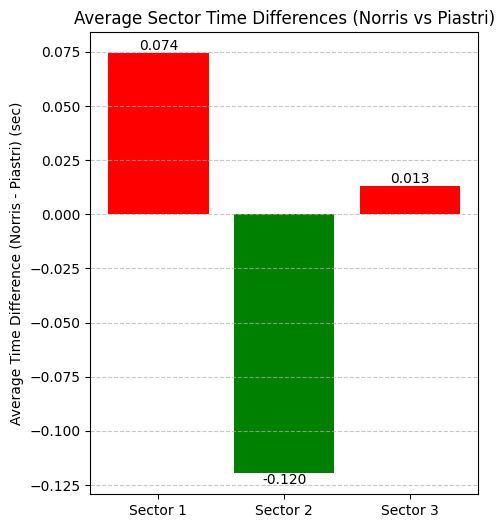

In [11]:
# Prepare data for plotting
data = {'Sector': ['Sector 1', 'Sector 2', 'Sector 3'],
        'Average Difference': [average_difference_S1, average_difference_S2, average_difference_S3]}
df_diff = pd.DataFrame(data)

# Create the clustered bar chart
plt.figure(figsize=(5, 6))
bars = plt.bar(df_diff['Sector'], df_diff['Average Difference'], color=df_diff['Average Difference'].apply(lambda x: 'red' if x > 0 else 'green'))

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom' if yval > 0 else 'top')

plt.ylabel('Average Time Difference (Norris - Piastri) (sec)')
plt.title('Average Sector Time Differences (Norris vs Piastri)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Line Chart with Comparison of Lap-Times between Norris and Piastri

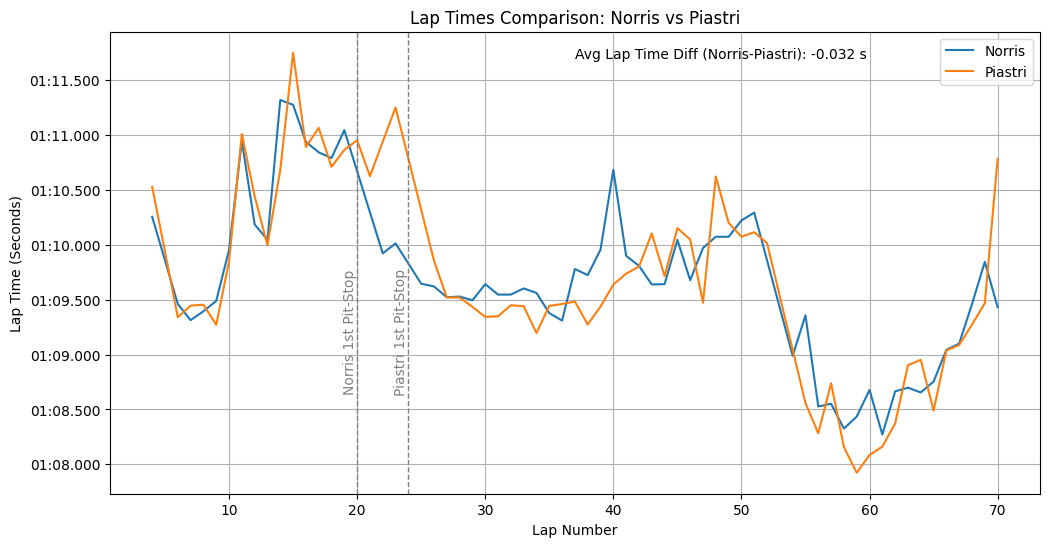

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime

# Filter out rows where LapTime is NaT
norris_laps_valid = norris_laps_edited.dropna(subset=['LapTime'])
piastri_laps_valid = piastri_laps_edited.dropna(subset=['LapTime'])

# Convert LapTime to total seconds for plotting
norris_laps_valid['LapTimeSeconds'] = norris_laps_valid['LapTime'].dt.total_seconds() * 1000
piastri_laps_valid['LapTimeSeconds'] = piastri_laps_valid['LapTime'].dt.total_seconds() * 1000

plt.figure(figsize=(12, 6))

plt.plot(norris_laps_valid['LapNumber'], norris_laps_valid['LapTimeSeconds'], label='Norris')
plt.plot(piastri_laps_valid['LapNumber'], piastri_laps_valid['LapTimeSeconds'], label='Piastri')


# Apply the formatter to the y-axis
formatter = mticker.FuncFormatter(format_milliseconds)
plt.gca().yaxis.set_major_formatter(formatter)

# Add vertical line and caption for Lap 13
plt.axvline(x=norris_pit_in_laps.iloc[0], color='gray', linestyle='--', lw=1)
plt.text(norris_pit_in_laps.iloc[0], plt.ylim()[1] * 0.97, 'Norris 1st Pit-Stop', rotation=90, verticalalignment='top', horizontalalignment='right', color='gray')

plt.axvline(x=piastri_pit_in_laps.iloc[0], color='gray', linestyle='--', lw=1)
plt.text(piastri_pit_in_laps.iloc[0], plt.ylim()[1] * 0.97, 'Piastri 1st Pit-Stop', rotation=90, verticalalignment='top', horizontalalignment='right', color='gray')

# Add average lap time difference to plot
plt.text(0.5, 0.95, f"Avg Lap Time Diff (Norris-Piastri): {average_laptime_difference:+.3f} s",
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

plt.xlabel('Lap Number')
plt.ylabel('Lap Time (Seconds)')
plt.title('Lap Times Comparison: Norris vs Piastri')
plt.legend()
plt.grid(True)
plt.show()

## Average Lap Time Comparison Between Lap 20 and Lap 25.

Norris pitted early and gained time on fresher tires. Piastri tried over-cut by going long and lost nearly 1 sec per lap.

In [ ]:
# Filter laps for the specified range (20 to 24 inclusive)
norris_lap_20_24 = norris_laps[(norris_laps['LapNumber'] >= 20) & (norris_laps['LapNumber'] <= 25)]
piastri_lap_20_24 = piastri_laps[(piastri_laps['LapNumber'] >= 20) & (piastri_laps['LapNumber'] <= 25)]

# Filter out rows where LapTime is NaT for the average calculation
norris_lap_20_24_valid = norris_lap_20_24.dropna(subset=['LapTime'])
piastri_lap_20_24_valid = piastri_lap_20_24.dropna(subset=['LapTime'])

# Convert LapTime to total seconds for calculating average
norris_lap_20_24_valid['LapTimeSeconds'] = norris_lap_20_24_valid['LapTime'].dt.total_seconds()
piastri_lap_20_24_valid['LapTimeSeconds'] = piastri_lap_20_24_valid['LapTime'].dt.total_seconds()

# Calculate the average lap time in seconds for the specified range
average_norris_laptime_20_24 = norris_lap_20_24_valid['LapTimeSeconds'].mean()
average_piastri_laptime_20_24 = piastri_lap_20_24_valid['LapTimeSeconds'].mean()

# Calculate the difference in average lap times for the specified range
average_laptime_difference_20_24 = average_norris_laptime_20_24 - average_piastri_laptime_20_24

print(f"Average Lap Time for Norris (Laps 20-24): {format_milliseconds(average_norris_laptime_20_24 * 1000, pos=None)}")
print(f"Average Lap Time for Piastri (Laps 20-24): {format_milliseconds(average_piastri_laptime_20_24 * 1000, pos=None)}")
print(f"Average Lap Time Difference (Norris - Piastri) (Laps 20-25): {average_laptime_difference_20_24:.3f} seconds")

Average Lap Time for Norris (Laps 20-24): 01:13.534
Average Lap Time for Piastri (Laps 20-24): 01:14.469
Average Lap Time Difference (Norris - Piastri) (Laps 20-25): -0.936 seconds
